<a href="https://colab.research.google.com/github/juancuadrado/DOE_2023/blob/main/Factorial_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseños factoriales con tres factores**

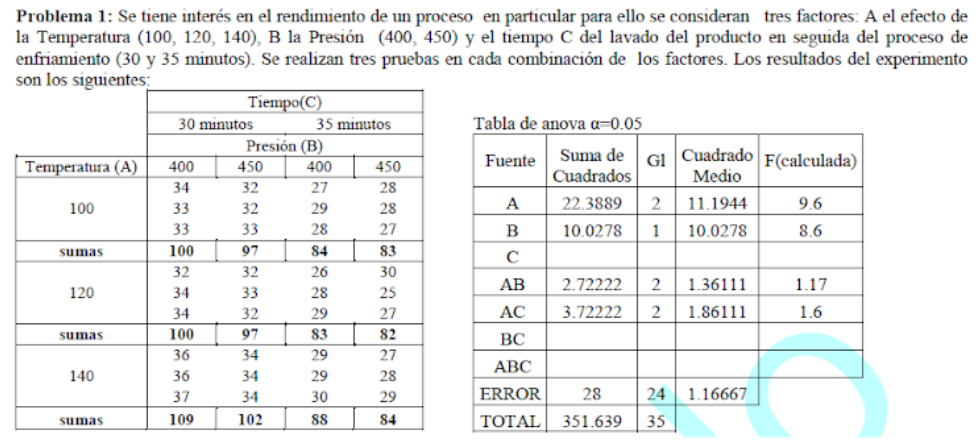

# **2. Librerias a usar**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Ingresando los df del problema a Python**

In [2]:
Temp  =  [ "A1",  "A2", "A3"]
P  =  [ "B1" ,  "B2" ]
t_Enfriamiento=  [ "C1" ,  "C2" ]
volumen_Y = [34, 33, 33, 32, 32, 33, 27, 29, 28, 28, 28, 27, 32, 34, 34, 32, 33, 32, 26, 28, 29, 30, 25, 27, 36, 36, 37, 34, 34, 34, 29, 29, 30, 27, 28, 29]

In [3]:
Temp = ["A1"] *12 + ["A2"] * 12 + ["A3"] * 12

P = (["B1"] * 3 + ["B2"] * 3 ) * 6
t_Enfriamiento = (["C1"] * 6 + ["C2"] * 6) * 3

print(len(Temp),len(P),len(t_Enfriamiento))

36 36 36


In [4]:
df  = pd.DataFrame({    'Temp': Temp,    'P': P,   't_Enfriamiento': t_Enfriamiento, 'volumen_Y': volumen_Y})

In [5]:
df

,Temp,P,t_Enfriamiento,volumen_Y
0,A1,B1,C1,34
1,A1,B1,C1,33
2,A1,B1,C1,33
3,A1,B2,C1,32
4,A1,B2,C1,32
5,A1,B2,C1,33
6,A1,B1,C2,27
7,A1,B1,C2,29
8,A1,B1,C2,28
9,A1,B2,C2,28


# **4. Análisis descriptivos - Box_Plots**

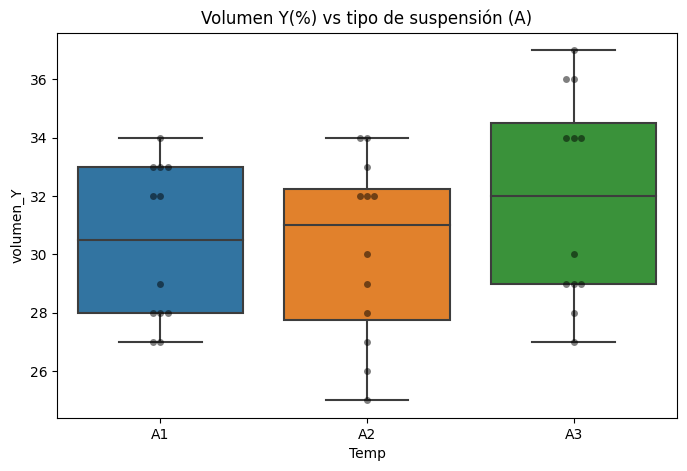

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.set_title('Volumen Y(%) vs tipo de suspensión (A)')
sns.boxplot(x="Temp", y="volumen_Y", data=df, ax=ax)
sns.swarmplot(x="Temp", y="volumen_Y", data=df, color='black', alpha=0.5, ax=ax);


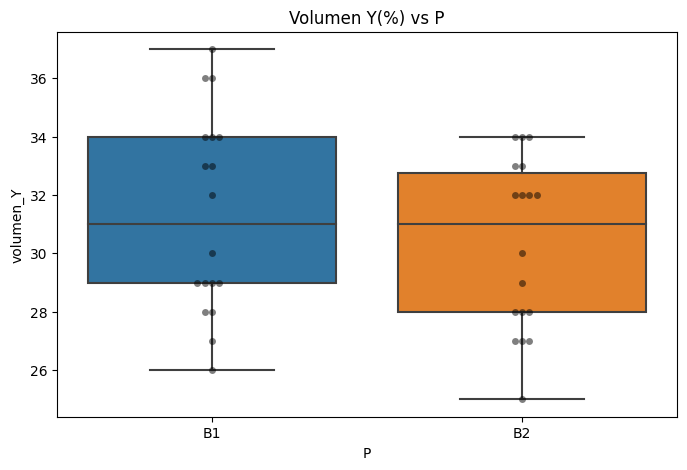

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.set_title('Volumen Y(%) vs P')
sns.boxplot(x="P", y="volumen_Y", data=df, ax=ax)
sns.swarmplot(x="P", y="volumen_Y", data=df, color='black', alpha=0.5, ax=ax);

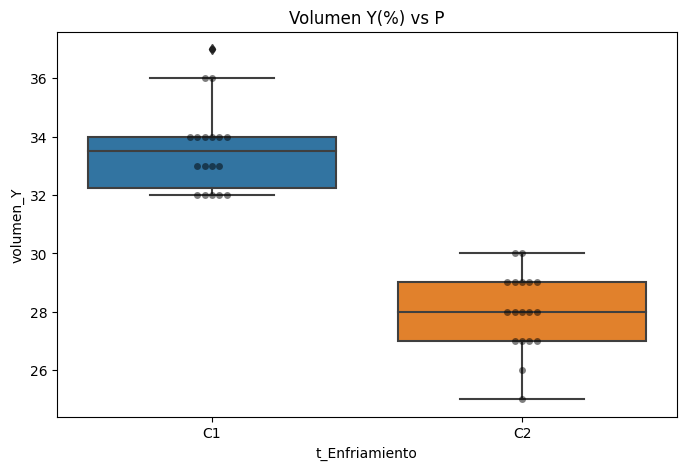

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.set_title('Volumen Y(%) vs P')
sns.boxplot(x="t_Enfriamiento", y="volumen_Y", data=df, ax=ax)
sns.swarmplot(x="t_Enfriamiento", y="volumen_Y", data=df, color='black', alpha=0.5, ax=ax);

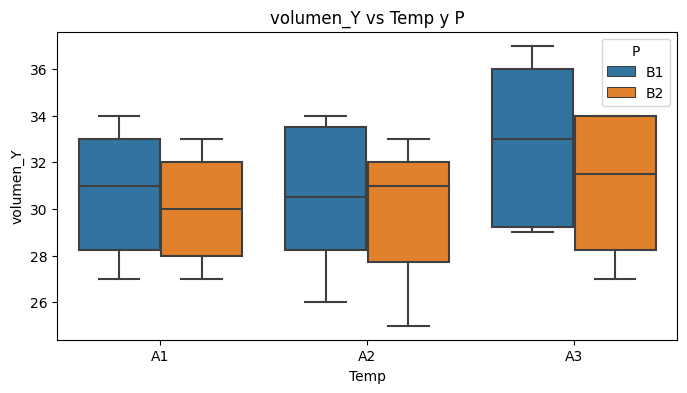

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('volumen_Y vs Temp y P')
sns.boxplot(x="Temp", y="volumen_Y", hue='P', data=df, ax=ax);

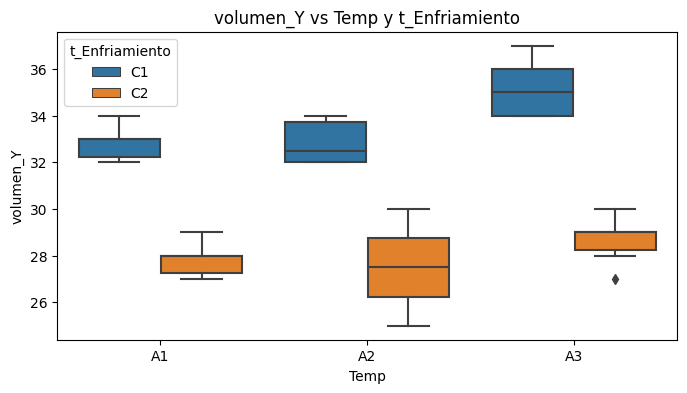

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('volumen_Y vs Temp y t_Enfriamiento')
sns.boxplot(x="Temp", y="volumen_Y", hue='t_Enfriamiento', data=df, ax=ax);

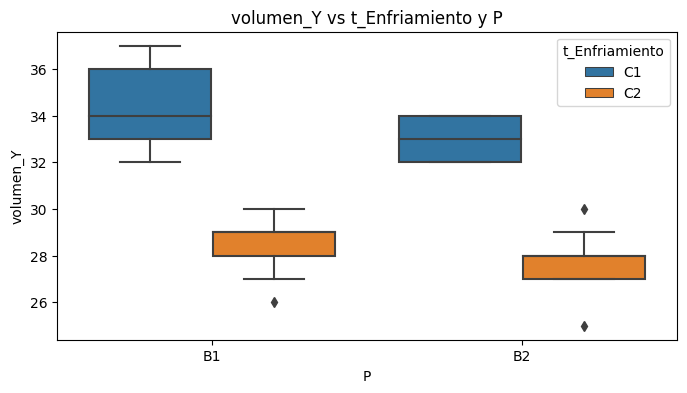

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('volumen_Y vs t_Enfriamiento y P')
sns.boxplot(x="P", y="volumen_Y", hue='t_Enfriamiento', data=df, ax=ax);

# **5. Análisis descriptivos - Medidas descriptivas**

In [12]:
print('volumen_Y media y desviación típica para Temp, P, t_Enfriamiento ')
df.groupby(['Temp', 'P', 't_Enfriamiento'])['volumen_Y'].agg(['mean', 'std'])

volumen_Y media y desviación típica para Temp, P, t_Enfriamiento 


mean       std
Temp P  t_Enfriamiento                     
A1   B1 C1              33.333333  0.577350
        C2              28.000000  1.000000
     B2 C1              32.333333  0.577350
        C2              27.666667  0.577350
A2   B1 C1              33.333333  1.154701
        C2              27.666667  1.527525
     B2 C1              32.333333  0.577350
        C2              27.333333  2.516611
A3   B1 C1              36.333333  0.577350
        C2              29.333333  0.577350
     B2 C1              34.000000  0.000000
        C2              28.000000  1.000000

# **6. Análisis descriptivos - Gráficos de Interacción**

In [13]:
from statsmodels.graphics.factorplots import interaction_plot

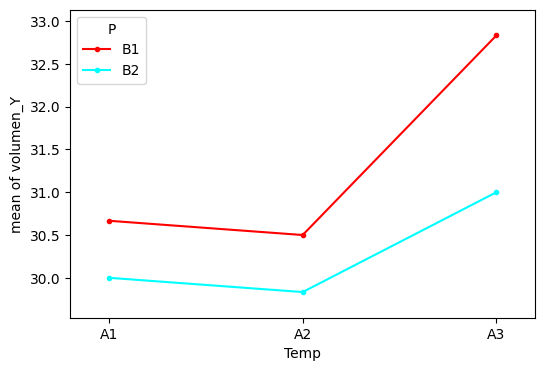

In [14]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = df.Temp,
    trace    = df.P,
    response = df.volumen_Y,
    ax       = ax,
)

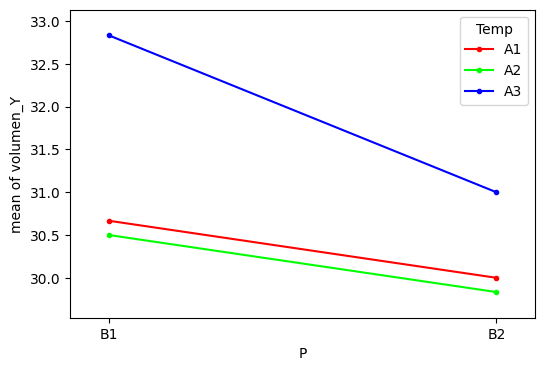

In [15]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    trace        = df.Temp,
    x    = df.P,
    response = df.volumen_Y,
    ax       = ax,
)

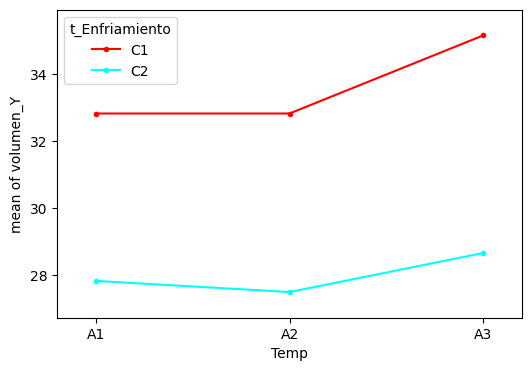

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = df.Temp,
    trace    = df.t_Enfriamiento,
    response = df.volumen_Y,
    ax       = ax,
)

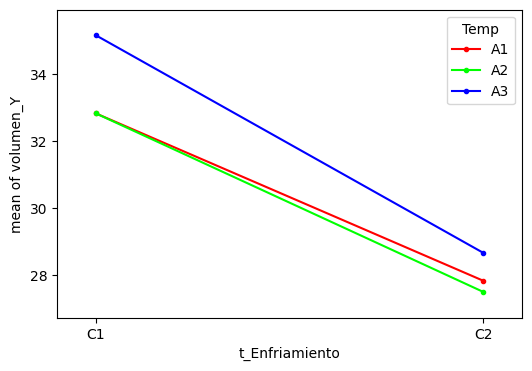

In [17]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    trace        = df.Temp,
    x    = df.t_Enfriamiento,
    response = df.volumen_Y,
    ax       = ax,
)

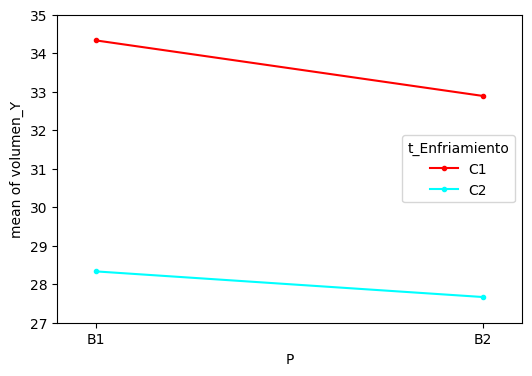

In [18]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = df.P,
    trace    = df.t_Enfriamiento,
    response = df.volumen_Y,
    ax       = ax,
)

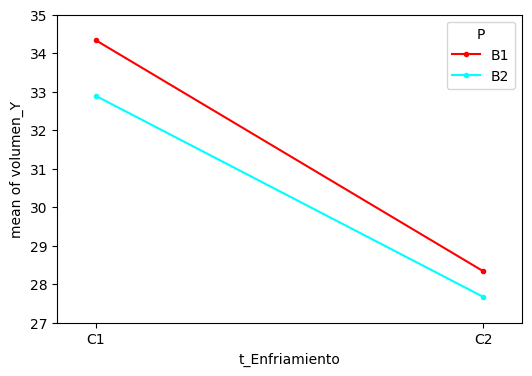

In [19]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    trace        = df.P,
    x    = df.t_Enfriamiento,
    response = df.volumen_Y,
    ax       = ax,
)

# **7. Análisis descriptivos - Análisis de Varianza**

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [21]:
model2 = ols('volumen_Y ~ Temp*P*t_Enfriamiento',                 # Model formula
            data = df).fit()

anova_result = sm.stats.anova_lm(model2, typ=2)
#print (anova_result)
anova_result

,sum_sq,df,F,PR(>F)
Temp,22.388889,2.0,9.595238,8.667203e-04
P,10.027778,1.0,8.595238,7.293760e-03
t_Enfriamiento,283.361111,1.0,242.880952,4.708271e-14
Temp:P,2.722222,2.0,1.166667,3.284467e-01
Temp:t_Enfriamiento,3.722222,2.0,1.595238,2.236316e-01
P:t_Enfriamiento,1.361111,1.0,1.166667,2.908225e-01
Temp:P:t_Enfriamiento,0.055556,2.0,0.023810,9.764947e-01
Residual,28.000000,24.0,NaN,NaN


# **7. Análisis descriptivos - Comparaciones múltiples**

In [22]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

group1,group2,meandiff,p-adj,lower,upper,reject
A1,A2,-0.1667,0.9908,-3.3309,2.9976,False
A1,A3,1.5833,0.4456,-1.5809,4.7476,False
A2,A3,1.75,0.3747,-1.4142,4.9142,False


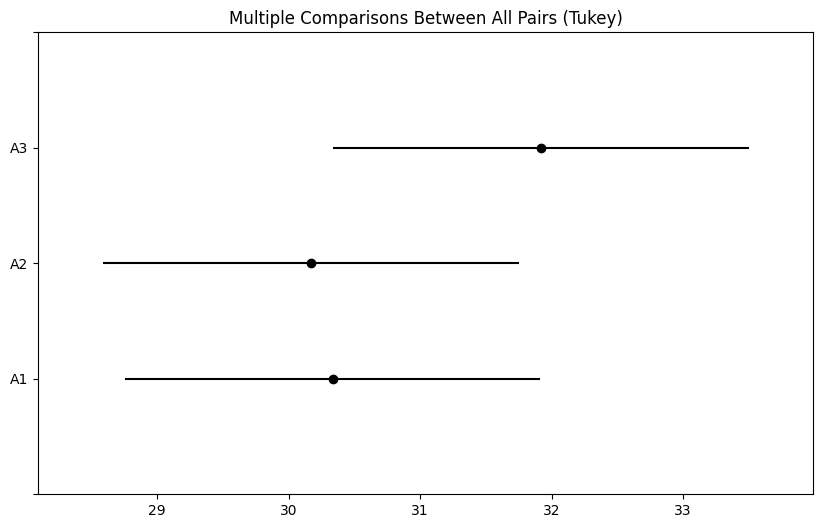

In [23]:
tukey = pairwise_tukeyhsd(endog=df["volumen_Y"],     # Data
                          groups=df["Temp"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=14.5, color="red")

tukey.summary()

In [24]:
tukey = pairwise_tukeyhsd(endog=df["volumen_Y"],     # Data
                          groups=df["P"],   # Groups
                          alpha=0.05)          # Significance level

#tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=49.57,ymin=-0.5,ymax=14.5, color="red")

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
B1,B2,-1.0556,0.3248,-3.2028,1.0917,False


In [25]:
import statsmodels.stats.multicomp as mc

interaction_groups = "Susp_" + df.Temp.astype(str) + " & " + "Aber_" + df.P.astype(str)

comp = mc.MultiComparison(df["volumen_Y"], interaction_groups)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Susp_A1 & Aber_B1,Susp_A1 & Aber_B2,-0.6667,0.9992,-6.3705,5.0372,False
Susp_A1 & Aber_B1,Susp_A2 & Aber_B1,-0.1667,1.0,-5.8705,5.5372,False
Susp_A1 & Aber_B1,Susp_A2 & Aber_B2,-0.8333,0.9976,-6.5372,4.8705,False
Susp_A1 & Aber_B1,Susp_A3 & Aber_B1,2.1667,0.8539,-3.5372,7.8705,False
Susp_A1 & Aber_B1,Susp_A3 & Aber_B2,0.3333,1.0,-5.3705,6.0372,False
Susp_A1 & Aber_B2,Susp_A2 & Aber_B1,0.5,0.9998,-5.2038,6.2038,False
Susp_A1 & Aber_B2,Susp_A2 & Aber_B2,-0.1667,1.0,-5.8705,5.5372,False
Susp_A1 & Aber_B2,Susp_A3 & Aber_B1,2.8333,0.6602,-2.8705,8.5372,False
Susp_A1 & Aber_B2,Susp_A3 & Aber_B2,1.0,0.9943,-4.7038,6.7038,False
Susp_A2 & Aber_B1,Susp_A2 & Aber_B2,-0.6667,0.9992,-6.3705,5.0372,False


In [26]:
interaction_groups = "Susp_" + df.Temp.astype(str) + " & " + "Tem_" + df.t_Enfriamiento.astype(str)

comp = mc.MultiComparison(df["volumen_Y"], interaction_groups)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Susp_A1 & Tem_C1,Susp_A1 & Tem_C2,-5.0,0.0,-7.0819,-2.9181,True
Susp_A1 & Tem_C1,Susp_A2 & Tem_C1,0.0,1.0,-2.0819,2.0819,False
Susp_A1 & Tem_C1,Susp_A2 & Tem_C2,-5.3333,0.0,-7.4153,-3.2514,True
Susp_A1 & Tem_C1,Susp_A3 & Tem_C1,2.3333,0.021,0.2514,4.4153,True
Susp_A1 & Tem_C1,Susp_A3 & Tem_C2,-4.1667,0.0,-6.2486,-2.0847,True
Susp_A1 & Tem_C2,Susp_A2 & Tem_C1,5.0,0.0,2.9181,7.0819,True
Susp_A1 & Tem_C2,Susp_A2 & Tem_C2,-0.3333,0.9963,-2.4153,1.7486,False
Susp_A1 & Tem_C2,Susp_A3 & Tem_C1,7.3333,0.0,5.2514,9.4153,True
Susp_A1 & Tem_C2,Susp_A3 & Tem_C2,0.8333,0.8249,-1.2486,2.9153,False
Susp_A2 & Tem_C1,Susp_A2 & Tem_C2,-5.3333,0.0,-7.4153,-3.2514,True


In [27]:
interaction_groups = "Aber_" + df.P.astype(str) + " & " + "Tem_" + df.t_Enfriamiento.astype(str)

comp = mc.MultiComparison(df["volumen_Y"], interaction_groups)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Aber_B1 & Tem_C1,Aber_B1 & Tem_C2,-6.0,0.0,-7.7029,-4.2971,True
Aber_B1 & Tem_C1,Aber_B2 & Tem_C1,-1.4444,0.1197,-3.1474,0.2585,False
Aber_B1 & Tem_C1,Aber_B2 & Tem_C2,-6.6667,0.0,-8.3696,-4.9637,True
Aber_B1 & Tem_C2,Aber_B2 & Tem_C1,4.5556,0.0,2.8526,6.2585,True
Aber_B1 & Tem_C2,Aber_B2 & Tem_C2,-0.6667,0.7154,-2.3696,1.0363,False
Aber_B2 & Tem_C1,Aber_B2 & Tem_C2,-5.2222,0.0,-6.9252,-3.5193,True


# **8. Análisis descriptivos - Supuestos del Modelo**


# **9. Normalidad - Supuestos del Modelo**

In [28]:
import scipy.stats as stats

stats.shapiro(model2.resid)

ShapiroResult(statistic=0.9427070021629333, pvalue=0.06170562654733658)

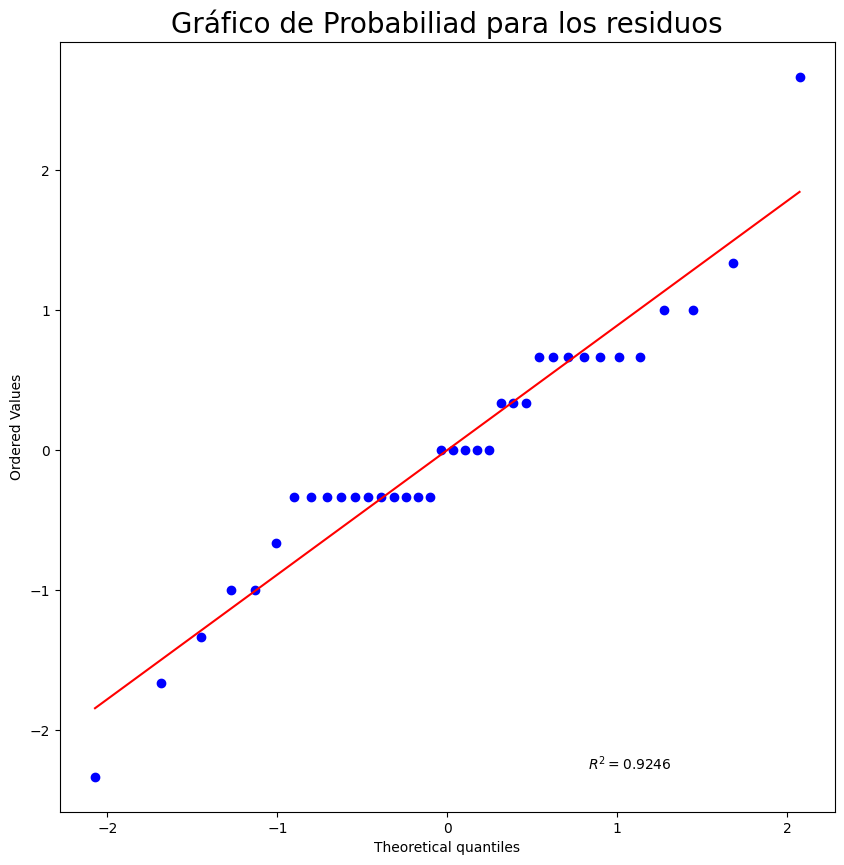

In [29]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model2.resid, plot= plt, rvalue= True)
ax.set_title("Gráfico de Probabiliad para los residuos", fontsize= 20)
ax.set

plt.show()

# **10. Supuestos del Modelo - Homocedasticidad**
### La suposición final es que todos los grupos tienen varianzas iguales. Un método para probar esta suposición es la prueba de homogeneidad de varianzas de Levene. Esto se puede completar usando el método levene() de Scipy.stats.*

In [30]:
stats.levene(df['volumen_Y'][df['Temp'] == 'A1'],
             df['volumen_Y'][df['Temp'] == 'A2'],
             df['volumen_Y'][df['Temp'] == 'A3'])

LeveneResult(statistic=1.2062193126022915, pvalue=0.3121826286876454)

In [31]:
stats.levene(df['volumen_Y'][df['P'] == 'B1'],
             df['volumen_Y'][df['P'] == 'B2'])

LeveneResult(statistic=0.6777868185516679, pvalue=0.4160873022476137)

In [32]:
stats.levene(df['volumen_Y'][df['t_Enfriamiento'] == 'C1'],
             df['volumen_Y'][df['t_Enfriamiento'] == 'C2'])

LeveneResult(statistic=0.3269230769230772, pvalue=0.571237619202388)

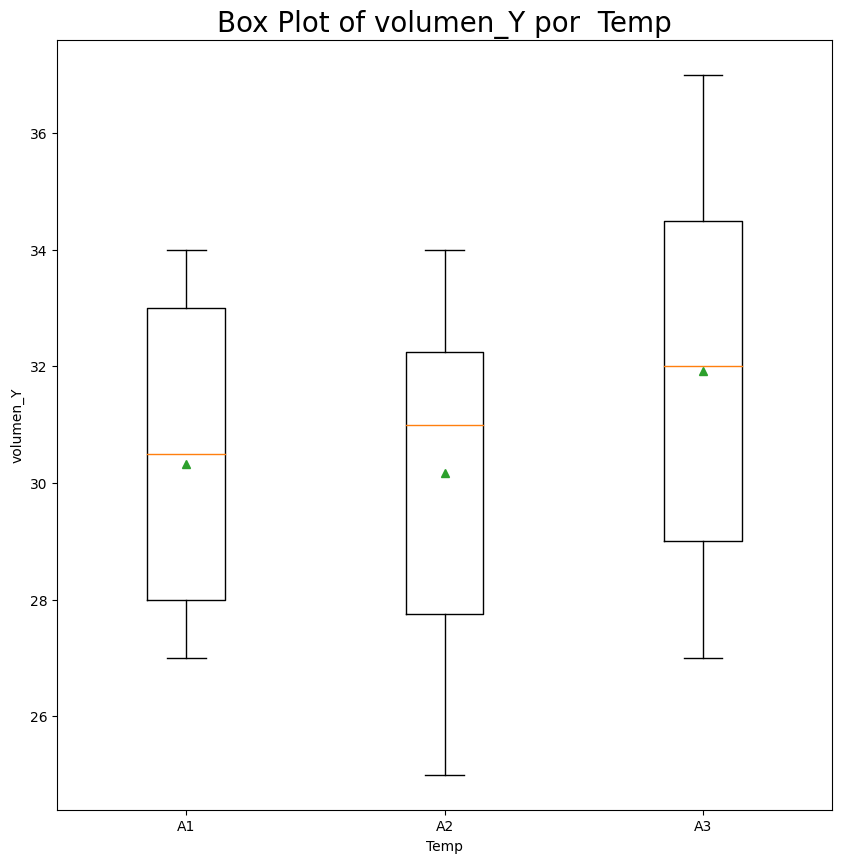

In [33]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of volumen_Y por  Temp", fontsize= 20)
ax.set

data = [df['volumen_Y'][df['Temp'] == 'A1'],
             df['volumen_Y'][df['Temp'] == 'A2'],
             df['volumen_Y'][df['Temp'] == 'A3']]

ax.boxplot(data,
           labels= ['A1', 'A2', 'A3'],
           showmeans= True)

plt.xlabel("Temp")
plt.ylabel("volumen_Y")

plt.show()

In [34]:
!pip install texttable &>/dev/null
from texttable import Texttable

t1 = Texttable()
b0, b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11= model2.params
# Tabla Resumen

t1.add_rows([['Parametro = bi','valor de bi para el modelo 1' ],
           ['b0',	b0],
           ['b1',	b1],
           ['b2',	b2],
           ['b3',	b3],
           ['b4', b4],
           ['b5', b5],
           ['b6',	b6],
           ['b7', b7],
           ['b8', b8],
           ['b9', b9],
           ['b10', b10],
           ['b11', b11]
             ])
print(t1.draw())

+----------------+------------------------------+
| Parametro = bi | valor de bi para el modelo 1 |
+================+==============================+
| b0             | 33.333                       |
+----------------+------------------------------+
| b1             | -0.000                       |
+----------------+------------------------------+
| b2             | 3.000                        |
+----------------+------------------------------+
| b3             | -1.000                       |
+----------------+------------------------------+
| b4             | -5.333                       |
+----------------+------------------------------+
| b5             | -0.000                       |
+----------------+------------------------------+
| b6             | -1.333                       |
+----------------+------------------------------+
| b7             | -0.333                       |
+----------------+------------------------------+
| b8             | -1.667                       |


In [35]:
from scipy.optimize import minimize

# Define la función que deseas maximizar se antepone el signo (-)
def funcion(x):
    return -(b0+b1*x[0] + b2*x[1] + b3*x[2] + b4*x[0]*x[1] + b5*x[0]*x[2] + b6*x[1]*x[2] + b7*x[0]*x[1]*x[2])

# Define las restricciones para x
def variables(x):
    return x[0], x[1], x[2]

# Definir las restricciones de límite para x
restricciones = [(-1, 1), (-1, 1), (-1, 1)]

# Suprimir la Bida de la optimización
res = minimize(funcion, [0, 0, 0], method='SLSQP', constraints={'type':'ineq', 'fun': variables}, bounds=restricciones)

# Imprimir el resultado
print("Resultado óptimo:")
print("x:", [2*round(m,0)-1 for m in res.x])
print("Valor Máximo:", -res.fun)  # Como minimizamos el negativo de la función


Resultado óptimo:
x: [-1.0, 1.0, -1.0]
Valor Máximo: 36.33333333333317
